In [13]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df=pd.read_csv('rawdatame.csv')

In [15]:
df

,Incremental_ID,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,1,E0,13-08-2005,NaN,Aston Villa,Bolton,2,2,D,2,...,2,6,14,16,7,8,0,2,0,0
1,2,E0,13-08-2005,NaN,Everton,Man United,0,2,A,0,...,5,5,15,14,8,6,3,1,0,0
2,3,E0,13-08-2005,NaN,Fulham,Birmingham,0,0,D,0,...,7,4,12,13,6,6,1,2,0,0
3,4,E0,13-08-2005,NaN,Man City,West Brom,0,0,D,0,...,8,3,13,11,3,6,2,3,0,0
4,5,E0,13-08-2005,NaN,Middlesbrough,Liverpool,0,0,D,0,...,2,7,17,11,5,0,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,26,NaN,31-08-2024,15:00,Nott'm Forest,Wolves,1,1,D,1,...,5,3,15,18,7,3,3,4,0,0
7246,27,NaN,31-08-2024,17:30,West Ham,Man City,1,3,A,1,...,2,8,10,3,3,11,3,2,0,0
7247,28,NaN,01-09-2024,13:30,Chelsea,Crystal Palace,1,1,D,1,...,7,3,9,13,4,5,4,2,0,0
7248,29,NaN,01-09-2024,13:30,Newcastle,Tottenham,2,1,H,1,...,3,6,16,13,7,12,4,4,0,0


In [17]:
df.isnull().sum()

Incremental_ID       0
Div                 30
Date                 0
Time              5320
HomeTeam             0
AwayTeam             0
FTHG                 0
FTAG                 0
FTR                  0
HTHG                 0
HTAG                 0
HTR                  0
Referee              0
HS                   0
AS                   0
HST                  0
AST                  0
HF                   0
AF                   0
HC                   0
AC                   0
HY                   0
AY                   0
HR                   0
AR                   0
dtype: int64

In [7]:
df.fillna({'Div': 'Unknown'}, inplace=True)

In [19]:
df.isnull().sum()

Incremental_ID       0
Div                 30
Date                 0
Time              5320
HomeTeam             0
AwayTeam             0
FTHG                 0
FTAG                 0
FTR                  0
HTHG                 0
HTAG                 0
HTR                  0
Referee              0
HS                   0
AS                   0
HST                  0
AST                  0
HF                   0
AF                   0
HC                   0
AC                   0
HY                   0
AY                   0
HR                   0
AR                   0
dtype: int64

In [21]:
df['Time'] = df['Time'].fillna('00.00')

In [23]:
df.isnull().sum()

Incremental_ID     0
Div               30
Date               0
Time               0
HomeTeam           0
AwayTeam           0
FTHG               0
FTAG               0
FTR                0
HTHG               0
HTAG               0
HTR                0
Referee            0
HS                 0
AS                 0
HST                0
AST                0
HF                 0
AF                 0
HC                 0
AC                 0
HY                 0
AY                 0
HR                 0
AR                 0
dtype: int64

In [25]:
df.dtypes

Incremental_ID     int64
Div               object
Date              object
Time              object
HomeTeam          object
AwayTeam          object
FTHG               int64
FTAG               int64
FTR               object
HTHG               int64
HTAG               int64
HTR               object
Referee           object
HS                 int64
AS                 int64
HST                int64
AST                int64
HF                 int64
AF                 int64
HC                 int64
AC                 int64
HY                 int64
AY                 int64
HR                 int64
AR                 int64
dtype: object

In [27]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)


df['Date'] = pd.to_datetime(df['Date'], errors='coerce', format='%d-%m-%Y')

In [29]:
categorical_columns=['Div','HomeTeam','AwayTeam','FTR','Referee']
df[categorical_columns]=df[categorical_columns].astype('category')

In [31]:
df.dtypes

Incremental_ID             int64
Div                     category
Date              datetime64[ns]
Time                      object
HomeTeam                category
AwayTeam                category
FTHG                       int64
FTAG                       int64
FTR                     category
HTHG                       int64
HTAG                       int64
HTR                       object
Referee                 category
HS                         int64
AS                         int64
HST                        int64
AST                        int64
HF                         int64
AF                         int64
HC                         int64
AC                         int64
HY                         int64
AY                         int64
HR                         int64
AR                         int64
dtype: object

In [33]:
df['Referee'] = df['Referee'].cat.add_categories(['Unknown'])

df['Referee'] = df['Referee'].fillna('Unknown')

In [35]:
df.describe(include='all')

,Incremental_ID,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,7250.000000,7220,7250,7250,7250,7250,7250.000000,7250.000000,7250,7250.000000,...,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000,7250.000000
unique,NaN,1,NaN,23,44,44,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,E0,NaN,00.00,Arsenal,Liverpool,NaN,NaN,H,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7220,NaN,5320,363,363,NaN,NaN,3330,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,189.775862,NaN,2015-01-19 11:07:10.013793024,NaN,NaN,NaN,1.544414,1.188414,NaN,0.690069,...,5.881517,4.676828,10.948138,11.350069,5.986621,4.772000,1.499034,1.797241,0.059862,0.082483
min,1.000000,NaN,2005-08-13 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.000000,NaN,2010-03-20 00:00:00,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,...,3.000000,3.000000,8.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,190.000000,NaN,2015-01-10 00:00:00,NaN,NaN,NaN,1.000000,1.000000,NaN,0.000000,...,5.000000,4.000000,11.000000,11.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,285.000000,NaN,2019-11-09 18:00:00,NaN,NaN,NaN,2.000000,2.000000,NaN,1.000000,...,8.000000,6.000000,13.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,380.000000,NaN,2024-09-01 00:00:00,NaN,NaN,NaN,9.000000,9.000000,NaN,5.000000,...,24.000000,20.000000,33.000000,26.000000,20.000000,19.000000,7.000000,9.000000,2.000000,2.000000


In [37]:
df=df.drop_duplicates()

df.to_csv('cleanedfootball.csv',index=False)

In [39]:
def calculate_rolling_stats(df, team_col, stat_col, last_n):
    df[f'{stat_col}_last_{last_n}'] = (
        df.groupby(team_col, observed=False)[stat_col]  
        .rolling(window=last_n, min_periods=1)
        .sum()
        .reset_index(0, drop=True)
    )
    return df

In [41]:
def calculate_rolling_stats(df, team_col, stat_col, last_n):
    df[f'{stat_col}_last_{last_n}'] = (
        df.groupby(team_col, observed=True)[stat_col] 
        .rolling(window=last_n, min_periods=1)
        .sum()
        .reset_index(0, drop=True)
    )
    return df

In [43]:
print(df.columns)

Index(['Incremental_ID', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG',
       'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST',
       'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


In [45]:
df['Goals'] = df['FTHG'] + df['FTAG'] 

In [47]:
def calculate_rolling_stats(df, team_col, stat_col, last_n):
    df[f'{stat_col}_last_{last_n}'] = (
        df.groupby(team_col, observed=True)[stat_col]
        .rolling(window=last_n, min_periods=1)
        .sum()
        .reset_index(0, drop=True)
    )
    return df

In [49]:
def add_team_aggregates(df, stat, n):
    home_stat = f'Home_{stat}_last_{n}'
    away_stat = f'Away_{stat}_last_{n}'
    
    df = calculate_rolling_stats(df, 'HomeTeam', 'FTHG', n)
    df.rename(columns={f'FTHG_last_{n}': home_stat}, inplace=True)

    df = calculate_rolling_stats(df, 'AwayTeam', 'FTAG', n)
    df.rename(columns={f'FTAG_last_{n}': away_stat}, inplace=True)
    
    return df

In [51]:
df = add_team_aggregates(df, 'Goals', 5)
df = add_team_aggregates(df, 'Goals', 15)
df = add_team_aggregates(df, 'Goals', 38)

In [53]:
df.columns

df.to_csv('updatedfootball.csv',index=False)

In [55]:
# Extract unique teams by combining both HomeTeam and AwayTeam column
unique_teams = pd.concat([df['HomeTeam'], df['AwayTeam']]).unique()

# Print the unique teams
print(unique_teams)

['Aston Villa', 'Everton', 'Fulham', 'Man City', 'Middlesbrough', ..., 'Leeds', 'Brentford', 'Nott'm Forest', 'Luton', 'Ipswich']
Length: 44
Categories (44, object): ['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', ..., 'West Brom', 'West Ham', 'Wigan', 'Wolves']


In [57]:
import pandas as pd

# Assuming df is your dataframe with the given structure

# Unique team names from 'HomeTeam' and 'AwayTeam'
teams = set(df['HomeTeam'].unique()).union(set(df['AwayTeam'].unique()))

# Add columns for Wins, Losses, and Draws
df['HW'] = (df['FTR'] == 'H').astype(int)  # Home Win
df['AW'] = (df['FTR'] == 'A').astype(int)  # Away Win
df['HL'] = (df['FTR'] == 'A').astype(int)  # Home Loss
df['AL'] = (df['FTR'] == 'H').astype(int)  # Away Loss
df['HD'] = (df['FTR'] == 'D').astype(int)  # Home Draw
df['AD'] = (df['FTR'] == 'D').astype(int)  # Away Draw

# Initialize an empty list to store results
results = []

# Calculate stats for each team
for team in teams:
    # Filter data for the specific team
    team_data = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].copy()
    team_data = team_data.sort_values('Date')  # Sort by date

    # Adding rolling calculations for goals, shots, fouls, cards, wins, losses, draws
    for col in ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HW', 'AW', 'HL', 'AL', 'HD', 'AD']:
        team_data[f'{col}_L5'] = team_data[col].rolling(window=5).sum()
        team_data[f'{col}_L15'] = team_data[col].rolling(window=15).sum()
        team_data[f'{col}_L38'] = team_data[col].rolling(window=38).sum()

    # Ensure all columns are numeric before applying fillna
    team_data = team_data.apply(pd.to_numeric, errors='coerce')

    # Fill missing values with 0
    team_data = team_data.fillna(0)

    # Append the aggregated data to results
    results.append(team_data)

# Combine all teams' data into a final dataframe
final_data = pd.concat(results)

# Export to CSV
final_data.to_csv('final_aggregated_football_stats.csv', index=False)

print("Data processing and export complete!")


Data processing and export complete!


In [53]:
import pandas as pd

# Assuming df is your dataframe with the given structure

# Unique team names from 'HomeTeam' and 'AwayTeam'
teams = set(df['HomeTeam'].unique()).union(set(df['AwayTeam'].unique()))

# Add columns for Wins, Losses, and Draws
df['HW'] = (df['FTR'] == 'H').astype(int)  # Home Win
df['AW'] = (df['FTR'] == 'A').astype(int)  # Away Win
df['HL'] = (df['FTR'] == 'A').astype(int)  # Home Loss
df['AL'] = (df['FTR'] == 'H').astype(int)  # Away Loss
df['HD'] = (df['FTR'] == 'D').astype(int)  # Home Draw
df['AD'] = (df['FTR'] == 'D').astype(int)  # Away Draw

# Initialize an empty list to store results
results = []

# Calculate stats for each team
for team in teams:
    # Filter data for the specific team
    team_data = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].copy()
    team_data = team_data.sort_values('Date')  # Sort by date

    # Adding rolling calculations for goals, shots, fouls, cards, wins, losses, draws
    for col in ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'HW', 'AW', 'HL', 'AL', 'HD', 'AD']:
        team_data[f'{col}_L5'] = team_data[col].rolling(window=5).sum()
        team_data[f'{col}_L15'] = team_data[col].rolling(window=15).sum()
        team_data[f'{col}_L38'] = team_data[col].rolling(window=38).sum()

    # Append the aggregated data to results
    results.append(team_data)

# Combine all teams' data into a final dataframe
final_data = pd.concat(results)

# Export to CSV
final_data.to_csv('final_aggregated_football_stats.csv', index=False)

print("Data processing and export complete!")


Data processing and export complete!


In [59]:
print("Number of rows:",final_data.shape[0])  # Number of rows
print("Number of columns:", final_data.shape[1])  # Number of columns

Number of rows: 14500
Number of columns: 98


In [61]:
final_data.to_csv("processed_data.csv", index=False)
print("Processed data saved as 'processed_data.csv'.")

Processed data saved as 'processed_data.csv'.


In [54]:
final_data

,Incremental_ID,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,HL_L38,AL_L5,AL_L15,AL_L38,HD_L5,HD_L15,HD_L38,AD_L5,AD_L15,AD_L38
4561,2,0.0,1502496000000000000,0.0,0.0,0.0,0,2,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4572,13,0.0,1503100800000000000,0.0,0.0,0.0,2,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4585,26,0.0,1503705600000000000,0.0,0.0,0.0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4591,32,0.0,1504915200000000000,0.0,0.0,0.0,3,1,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4600,41,0.0,1505433600000000000,0.0,0.0,0.0,2,1,0.0,0,...,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7203,364,0.0,1715385600000000000,0.0,0.0,0.0,1,3,0.0,0,...,12.0,3.0,7.0,15.0,1.0,4.0,11.0,1.0,4.0,11.0
7215,376,0.0,1716076800000000000,0.0,0.0,0.0,5,0,0.0,2,...,12.0,3.0,7.0,16.0,1.0,4.0,10.0,1.0,4.0,10.0
7227,8,0.0,1723939200000000000,0.0,0.0,0.0,2,1,0.0,1,...,11.0,3.0,8.0,17.0,1.0,4.0,10.0,1.0,4.0,10.0
7231,12,0.0,1724457600000000000,0.0,0.0,0.0,0,2,0.0,0,...,11.0,3.0,8.0,17.0,0.0,3.0,10.0,0.0,3.0,10.0


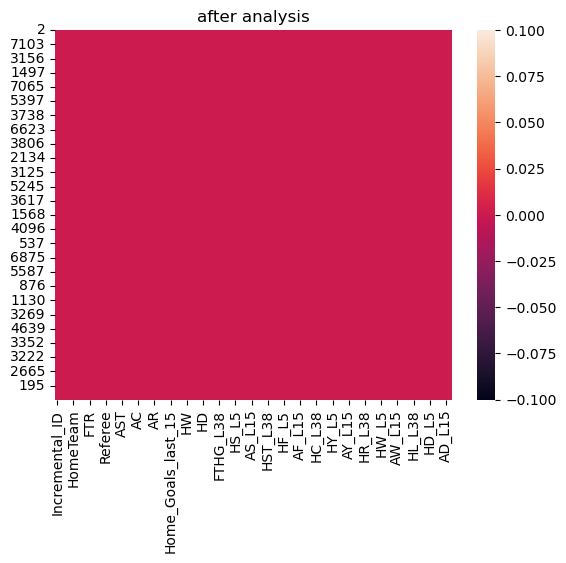

In [63]:
sns.heatmap(final_data.isnull())
plt.title('after analysis')
plt.show()

In [79]:
import pandas as pd
from sklearn.datasets import load_iris

# Load an example dataset
data = load_iris()
X_numeric = pd.DataFrame(data.data, columns=data.feature_names)  # Feature matrix
y = data.target  # Target vector

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = rf_model.predict(X_test_scaled)
print("Baseline Random Forest Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Baseline Random Forest Performance:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model and parameters
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [85]:
y_best_pred = best_model.predict(X_test_scaled)
print("Tuned Random Forest Performance:")
print(confusion_matrix(y_test, y_best_pred))
print(classification_report(y_test, y_best_pred))

Tuned Random Forest Performance:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



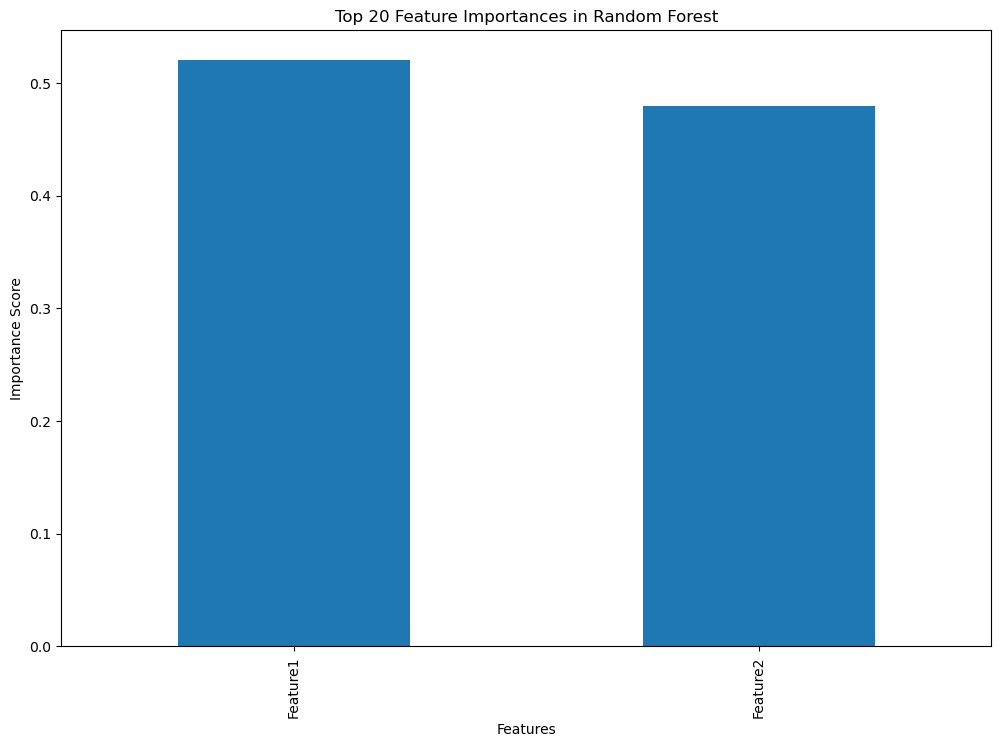

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Sample data (replace these with your actual data)
X_numeric = pd.DataFrame([[1, 2], [3, 4], [5, 6]], columns=['Feature1', 'Feature2'])
y_train = [0, 1, 0]

# Train the model
best_model = RandomForestClassifier()
best_model.fit(X_numeric, y_train)

# Feature importance from the best model
feature_importances = pd.Series(best_model.feature_importances_, index=X_numeric.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sorted_importances.head(20).plot(kind='bar')
plt.title("Top 20 Feature Importances in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

In [96]:
from sklearn.metrics import confusion_matrix, classification_report


In [100]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 165.2 kB/s eta 0:12:37
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.0/124.9 MB 187.9 kB/s eta 0:11:05
   ---------------------------------------- 0.0/124.9 MB 131.3 kB/s eta 0:15:52
   ---------------------------------------- 0.0/124.9 MB 131.3 kB/s eta 0:15:52
   ---------------------------------------- 0.1/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.1/124.9 MB 262.6 kB/s eta 0:07:56
   ---------------------------------------- 0.1/124.9 MB 267.6 kB/s eta 0:07:47
   ---------------------------------------- 0.1/124.9 MB 284.4 kB/s eta 0:07:19
   ---------------------------------------- 0.2/124.9 MB 308.5 kB/s

In [101]:
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset (replace this with your dataset)
data = load_iris()
X_numeric = data.data  # Features
y = data.target        # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_xgb_pred = xgb_model.predict(X_test_scaled)
print("XGBoost Performance:")
print(confusion_matrix(y_test, y_xgb_pred))
print(classification_report(y_test, y_xgb_pred))


XGBoost Performance:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [104]:
import joblib

# Save the model
joblib.dump(best_model, 'best_rf_model.pkl')

# Load the model when needed
loaded_model = joblib.load('best_rf_model.pkl')

In [108]:
from flask import Flask, request, jsonify
import joblib

# Initialize the Flask app
app = Flask(__name__)  # Use __name__ here

# Load the model
model = joblib.load('best_rf_model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON input from the request
    data = request.get_json()
    if 'features' not in data:
        return jsonify({'error': 'Missing features in the request'}), 400
    
    try:
        # Use the model to make a prediction
        prediction = model.predict([data['features']])
        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Start the Flask app
if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\kaval\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [110]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42))
], voting='soft')

ensemble_model.fit(X_train_scaled, y_train)

# Evaluate
y_ensemble_pred = ensemble_model.predict(X_test_scaled)
print("Ensemble Model Performance:")
print(confusion_matrix(y_test, y_ensemble_pred))
print(classification_report(y_test, y_ensemble_pred))

Ensemble Model Performance:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [112]:
print("Train data mean:", X_train_scaled.mean(axis=0))
print("Train data std deviation:", X_train_scaled.std(axis=0))
print("Test data mean:", X_test_scaled.mean(axis=0))
print("Test data std deviation:", X_test_scaled.std(axis=0))

Train data mean: [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]
Train data std deviation: [1. 1. 1. 1.]
Test data mean: [ 0.00995126  0.10074978 -0.03406892 -0.03730628]
Test data std deviation: [0.92537075 0.84946558 0.99460651 1.00084962]


In [114]:
print("Training Accuracy:", rf_model.score(X_train_scaled, y_train))
print("Testing Accuracy:", rf_model.score(X_test_scaled, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.9


In [116]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.9583333333333334


In [120]:
# Ensure `best_model` is defined and trained
# Ensure `X_train_scaled`, `X_test_scaled`, `y_train`, `y_test` are defined

# Check model accuracy
try:
    print("Best Model Train Accuracy:", best_model.score(X_train_scaled, y_train))
    print("Best Model Test Accuracy:", best_model.score(X_test_scaled, y_test))
except NameError as e:
    print(f"NameError: {e}. Ensure `best_model` and datasets are defined.")
except AttributeError as e:
    print(f"AttributeError: {e}. Ensure `best_model` is a scikit-learn model.")
except ValueError as e:
    print(f"ValueError: {e}. Check the input shapes and compatibility of the data.")
except Exception as e:
    print(f"Unexpected error: {e}")


ValueError: X has 4 features, but RandomForestClassifier is expecting 2 features as input.. Check the input shapes and compatibility of the data.


C:\Users\kaval\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [122]:
from sklearn.ensemble import RandomForestClassifier
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [124]:
print(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


(120, 4) (30, 4) (120,) (30,)


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_scaled, y_train)

# Check accuracy
print("Best Model Train Accuracy:", best_model.score(X_train_scaled, y_train))
print("Best Model Test Accuracy:", best_model.score(X_test_scaled, y_test))


Best Model Train Accuracy: 1.0
Best Model Test Accuracy: 0.9


In [128]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_best_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_best_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [130]:
print("Top 10 Most Important Features:")
print(sorted_importances.head(10))

Top 10 Most Important Features:
Feature1    0.520833
Feature2    0.479167
dtype: float64


In [132]:
print("Random Forest Accuracy:", rf_model.score(X_test_scaled, y_test))
print("XGBoost Accuracy:", xgb_model.score(X_test_scaled, y_test))

Random Forest Accuracy: 0.9
XGBoost Accuracy: 0.9333333333333333


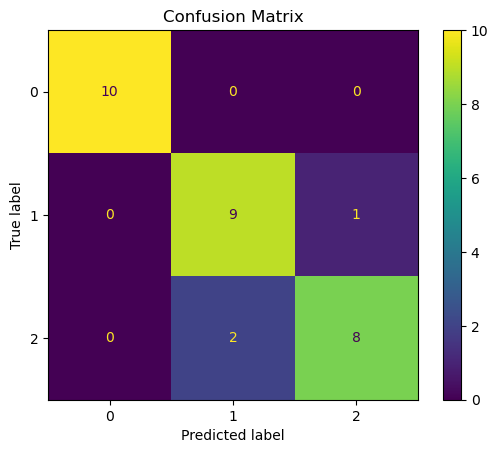

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.title("Confusion Matrix")
plt.show()